In [49]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline
import numpy as np

In [50]:
manufacturing_process_df = pd.read_csv('dataset.csv')
manufacturing_process_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             1000 non-null   int64  
 1   Timestamp      1000 non-null   object 
 2   SensorReading  1000 non-null   float64
 3   MachineStatus  1000 non-null   object 
 4   QualityCheck   1000 non-null   bool   
 5   ProductCount   1000 non-null   int64  
dtypes: bool(1), float64(1), int64(2), object(2)
memory usage: 40.2+ KB


In [51]:
# check for missing values
print(manufacturing_process_df.isnull().sum())

ID               0
Timestamp        0
SensorReading    0
MachineStatus    0
QualityCheck     0
ProductCount     0
dtype: int64


In [ ]:
# check target variable Machine Status
print(manufacturing_process_df['MachineStatus'].value_counts())

MachineStatus
Standby    345
Off        332
On         323
Name: count, dtype: int64


Text(0, 0.5, 'Machine Status')

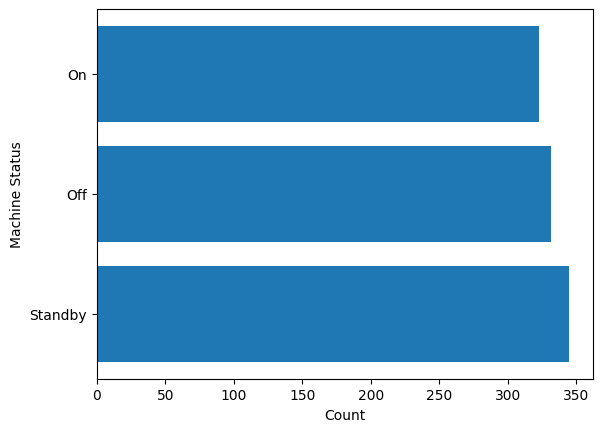

In [52]:
#chart fot target variable
plt.barh(manufacturing_process_df['MachineStatus'].value_counts().index, manufacturing_process_df['MachineStatus'].value_counts().values)
plt.xlabel('Count')
plt.ylabel('Machine Status')
#plt.show()


In [53]:
# display the numerical features and see correlation between them
numerical_features = manufacturing_process_df.select_dtypes(include = np.number)
corr = numerical_features.corr()
print(corr)

# no linear relationship between these values

                     ID  SensorReading  ProductCount
ID             1.000000       -0.02187      0.024319
SensorReading -0.021870        1.00000     -0.022150
ProductCount   0.024319       -0.02215      1.000000


In [54]:
# plt.figure(figsize = (8, 8))
# sns.heatmap(corr, annot = True)
# plt.show()


In [55]:
# drop columns we won't use
# manufacturing_process_df_copy = manufacturing_process_df.drop(['ID'], axis = 1)
#print(manufacturing_process_df.columns)
manufacturing_process_df_copy = manufacturing_process_df.drop(['ProductCount'], axis = 1)
print(manufacturing_process_df_copy)

       ID Timestamp  SensorReading MachineStatus  QualityCheck
0       1   24:28.7      43.081004       Standby          True
1       2   24:28.7      71.312491            On          True
2       3   24:28.7      19.096745       Standby         False
3       4   24:28.7      28.951475            On          True
4       5   24:28.7      46.283914       Standby          True
..    ...       ...            ...           ...           ...
995   996   24:28.8      38.546762           Off         False
996   997   24:28.8       6.231278            On         False
997   998   24:28.8      78.568037            On         False
998   999   24:28.8      27.776515           Off          True
999  1000   24:28.8      11.580693       Standby          True

[1000 rows x 5 columns]


In [56]:
manufacturing_process_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             1000 non-null   int64  
 1   Timestamp      1000 non-null   object 
 2   SensorReading  1000 non-null   float64
 3   MachineStatus  1000 non-null   object 
 4   QualityCheck   1000 non-null   bool   
dtypes: bool(1), float64(1), int64(1), object(2)
memory usage: 32.4+ KB


In [57]:
# using one hot encoding to convert categorical data to numerical
print(pd.get_dummies(manufacturing_process_df_copy['MachineStatus']))
print(pd.get_dummies(manufacturing_process_df_copy['Timestamp']))

       Off     On  Standby
0    False  False     True
1    False   True    False
2    False  False     True
3    False   True    False
4    False  False     True
..     ...    ...      ...
995   True  False    False
996  False   True    False
997  False   True    False
998   True  False    False
999  False  False     True

[1000 rows x 3 columns]
     24:28.7  24:28.8
0       True    False
1       True    False
2       True    False
3       True    False
4       True    False
..       ...      ...
995    False     True
996    False     True
997    False     True
998    False     True
999    False     True

[1000 rows x 2 columns]


In [58]:
# print new encoded data frame
manufacturing_process_df_copy_encoded = pd.get_dummies(data = manufacturing_process_df_copy, columns =['Timestamp'])
manufacturing_process_df_copy_encoded.tail()

,ID,SensorReading,MachineStatus,QualityCheck,Timestamp_24:28.7,Timestamp_24:28.8
995,996,38.546762,Off,False,False,True
996,997,6.231278,On,False,False,True
997,998,78.568037,On,False,False,True
998,999,27.776515,Off,True,False,True
999,1000,11.580693,Standby,True,False,True


In [62]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(manufacturing_process_df_copy_encoded[['SensorReading', 'MachineStatus'] + [col for col in manufacturing_process_df_copy_encoded.columns if 'Timestamp' in col]])
print(scaled_features)

[[-0.28993163  1.19971208  0.62515645 -0.62515645]
 [ 0.68170534 -0.01580168  0.62515645 -0.62515645]
 [-1.1153927   1.19971208  0.62515645 -0.62515645]
 ...
 [ 0.9314179  -0.01580168 -1.59959959  1.59959959]
 [-0.81666291 -1.23131544 -1.59959959  1.59959959]
 [-1.37407102  1.19971208 -1.59959959  1.59959959]]


In [63]:
from sklearn.model_selection import train_test_split

machine_status_mapping = {'On': 1, 'Off': 0, 'Standby': 2}
manufacturing_process_df_copy_encoded['MachineStatus'] = (manufacturing_process_df_copy['MachineStatus'].map(machine_status_mapping))
print(manufacturing_process_df_copy_encoded.columns)


X = manufacturing_process_df_copy_encoded.drop(['MachineStatus'], axis = 1)
y = manufacturing_process_df_copy_encoded['MachineStatus']
print(X)
print(y)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2, random_state = 42)

# #view data split
print(X_train.shape)
print(X_valid.shape)
print(y_train.shape)
print(y_valid.shape)

# print(y_train.unique)



Index(['ID', 'SensorReading', 'MachineStatus', 'QualityCheck',
       'Timestamp_24:28.7', 'Timestamp_24:28.8'],
      dtype='object')
       ID  SensorReading  QualityCheck  Timestamp_24:28.7  Timestamp_24:28.8
0       1      43.081004          True               True              False
1       2      71.312491          True               True              False
2       3      19.096745         False               True              False
3       4      28.951475          True               True              False
4       5      46.283914          True               True              False
..    ...            ...           ...                ...                ...
995   996      38.546762         False              False               True
996   997       6.231278         False              False               True
997   998      78.568037         False              False               True
998   999      27.776515          True              False               True
999  1000      11.

In [64]:
# a model to classify machine status
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(multi_class= 'multinomial', solver = 'lbfgs', max_iter=1000)

#Train
logistic_model.fit(X_train, y_train)


#Predict
y_predict_valid = logistic_model.predict(X_valid)

# Determines the accuracy of model to see its performance
from sklearn.metrics import accuracy_score, classification_report

print(f"Accuracy Score: {accuracy_score(y_valid, y_predict_valid)}")
print(classification_report(y_valid, y_predict_valid))

Accuracy Score: 0.35
              precision    recall  f1-score   support

           0       0.33      0.28      0.30        68
           1       0.31      0.25      0.28        60
           2       0.39      0.50      0.44        72

    accuracy                           0.35       200
   macro avg       0.34      0.34      0.34       200
weighted avg       0.34      0.35      0.34       200



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


The closer the value is to 1, the more confident the data is for a Logistic Regression Algorithm. The accuracy is low showing the model's poor job at predicton. Feature engineering and cros validation can be used to improve the model's performance.

In [65]:
#Using Random Forest modeling
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

y_predict = rf_model.predict(X_valid)

from sklearn.metrics import accuracy_score, classification_report

print(f"Accuracy Score: {accuracy_score(y_valid, y_predict)}")
print(classification_report(y_valid, y_predict))

Accuracy Score: 0.395
              precision    recall  f1-score   support

           0       0.37      0.41      0.39        68
           1       0.39      0.40      0.39        60
           2       0.43      0.38      0.40        72

    accuracy                           0.40       200
   macro avg       0.40      0.40      0.40       200
weighted avg       0.40      0.40      0.40       200



Poor model performance

In [67]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(objective = 'multi:softmax', num_class = 3, random_state = 42) #initiate model, using softmax objective for multi class classification
xgb_model.fit(X_train, y_train)

# Predict on the validation set
y_predict_xgb = xgb_model.predict(X_valid)

# Evaluate the model
print(f"Accuracy Score: {accuracy_score(y_valid, y_predict_xgb)}")
print(classification_report(y_valid, y_predict_xgb))


Accuracy Score: 0.355
              precision    recall  f1-score   support

           0       0.36      0.41      0.38        68
           1       0.33      0.33      0.33        60
           2       0.37      0.32      0.34        72

    accuracy                           0.35       200
   macro avg       0.35      0.35      0.35       200
weighted avg       0.36      0.35      0.35       200



Model need more tuning for good performance